Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Reading dataset

In [2]:
wine_df = pd.read_csv('/content/red wine.zip')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Determine the dimensions of dataframe

In [4]:
wine_df.shape

(1599, 12)

Check for null values

In [5]:

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values..

To get summary statistics,

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


To get correlation matrix:

In [7]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [8]:
corr_data = wine_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

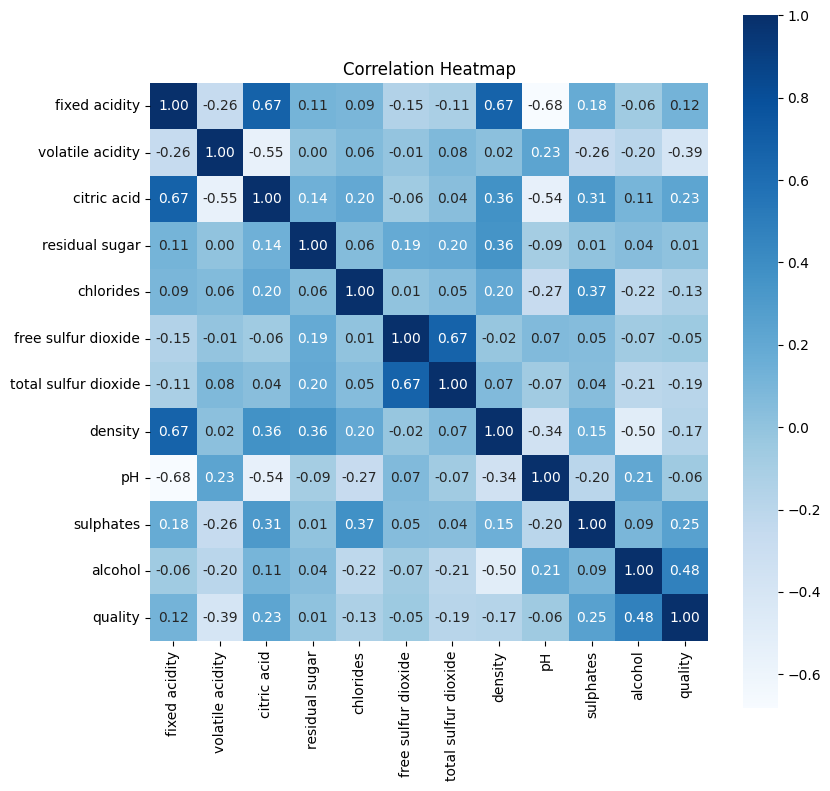

In [9]:
plt.figure(figsize = (9, 9))
sns.heatmap(corr_data, cbar = True, square= True, annot=True, fmt= '.2f',  cmap='Blues')
plt.title('Correlation Heatmap')

Number of wines in each quality category

Text(0.5, 1.0, 'Number of wines in each quality category')

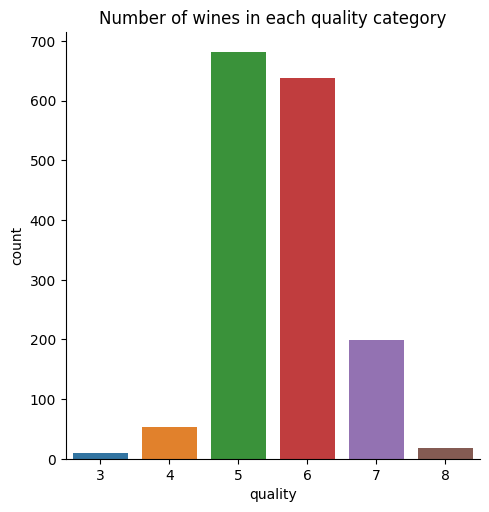

In [10]:

sns.catplot(x='quality',  data=wine_df, kind='count')
plt.title('Number of wines in each quality category')

Relationship between quality and volatile acidity

<Axes: xlabel='quality', ylabel='volatile acidity'>

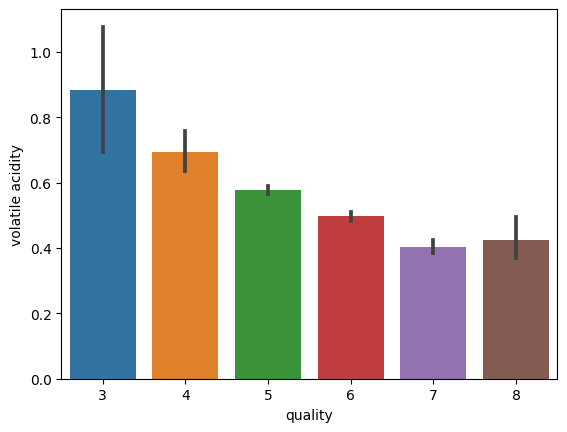

In [11]:

sns.barplot(x = 'quality', y= 'volatile acidity', data = wine_df)

Relationship between quality and alcohol

<Axes: xlabel='quality', ylabel='alcohol'>

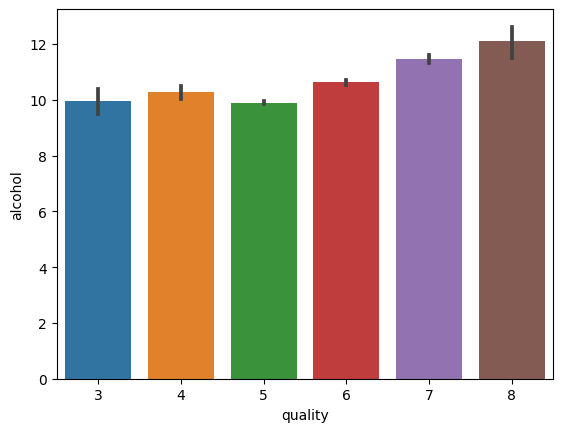

In [12]:

sns.barplot(x = 'quality', y = 'alcohol', data = wine_df)

In [13]:
X = wine_df.drop('quality', axis= 1)
y = wine_df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

First  line is for creating a DataFrame X that contains the features (independent variables) for your machine learning model. It does so by dropping the 'quality' column from the wine_df DataFrame along the specified axis (axis=1 refers to dropping a column). This  done to separate the input features from the target variable you want to predict.
second  line is for creating a Series y that represents the target variable or labels for the classification task. It's based on the 'quality' column in the wine_df.

To count the number of occurrences of unique values

In [14]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

Splitting dataset to training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 3)

Using the random forest classifier on  training data and using it to make predictions on the testing data

In [16]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [18]:
from sklearn.metrics import accuracy_score

To test the accuracy

In [21]:

X_test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, X_test_preds)

In [20]:
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

Test accuracy: 91.56%
